In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
rock_dir = os.path.join(r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps","rock")
paper_dir = os.path.join(r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps","paper")
scissors_dir = os.path.join(r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps","scissors")

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


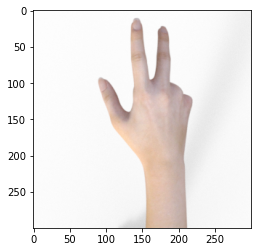

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.layers import Dense, Conv2D, Input
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import callbacks, optimizers

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_v2_preprocess_input
from keras_preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [9]:
TRAINING_DIR = r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps"
training_datagen = ImageDataGenerator(rescale = 1./255)
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size = (150,150), 
                                                         class_mode = 'categorical')

VALIDATION_DIR = r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,target_size=(150,150),
                                                              class_mode='categorical') 

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(training_generator, epochs=15, validation_data = validation_generator, verbose = 1)

Epoch 1/15
79/79 [==============================] - 117s 1s/step - loss: 0.6813 - accuracy: 0.7425 - val_loss: 0.8214 - val_accuracy: 0.7984
Epoch 2/15
79/79 [==============================] - 152s 2s/step - loss: 0.0680 - accuracy: 0.9770 - val_loss: 0.8824 - val_accuracy: 0.6425
Epoch 3/15
79/79 [==============================] - 152s 2s/step - loss: 0.0234 - accuracy: 0.9944 - val_loss: 1.0276 - val_accuracy: 0.8441
Epoch 4/15
79/79 [==============================] - 152s 2s/step - loss: 0.0341 - accuracy: 0.9933 - val_loss: 1.1694 - val_accuracy: 0.8817
Epoch 5/15
79/79 [==============================] - 152s 2s/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.6573 - val_accuracy: 0.8441
Epoch 6/15
79/79 [==============================] - 152s 2s/step - loss: 1.7696e-05 - accuracy: 1.0000 - val_loss: 2.2165 - val_accuracy: 0.8602
Epoch 7/15
79/79 [==============================] - 1320s 17s/step - loss: 0.0851 - accuracy: 0.9929 - val_loss: 1.5443 - val_accuracy: 0.8145
Epoch 8

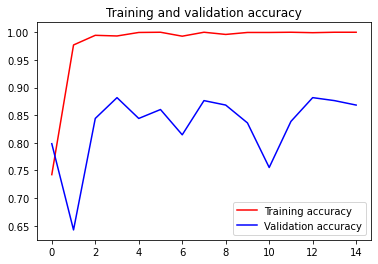

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

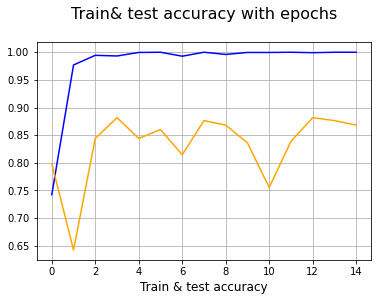

In [12]:
plt.plot(history.history['accuracy'], color ='blue', label='train')
plt.plot(history.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train& test accuracy with epochs\n", fontsize=16)
plt.xlabel("Train epoche", fontsize=12)
plt.xlabel("Train & test accuracy", fontsize=12)
plt.show()

In [14]:
from PIL import Image

TRAINING_DIR = r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = r"C:\Users\Admin\Desktop\MOON\Python\Cour Tensorflow\Image classification tensorfolw\rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, 
                    validation_steps=3)

model.save("my_model.hdf5")

Epoch 1/10
20/20 [==============================] - 149s 7s/step - loss: 1.2769 - accuracy: 0.3448 - val_loss: 1.0888 - val_accuracy: 0.3656
Epoch 2/10
20/20 [==============================] - 147s 7s/step - loss: 1.0759 - accuracy: 0.4349 - val_loss: 0.9250 - val_accuracy: 0.7500
Epoch 3/10
20/20 [==============================] - 146s 7s/step - loss: 1.0187 - accuracy: 0.4968 - val_loss: 0.8691 - val_accuracy: 0.4892
Epoch 4/10
20/20 [==============================] - 151s 8s/step - loss: 0.9255 - accuracy: 0.5722 - val_loss: 0.6240 - val_accuracy: 0.7204
Epoch 5/10
20/20 [==============================] - 146s 7s/step - loss: 0.7948 - accuracy: 0.6321 - val_loss: 0.3435 - val_accuracy: 0.9624
Epoch 6/10
20/20 [==============================] - 153s 8s/step - loss: 0.7304 - accuracy: 0.6913 - val_loss: 0.4331 - val_accuracy: 0.9274
Epoch 7/10
20/20 [==============================] - 155s 8s/step - loss: 0.5513 - accuracy: 0.7742 - val_loss: 0.2666 - val_accuracy: 0.9758
Epoch 8/10
20

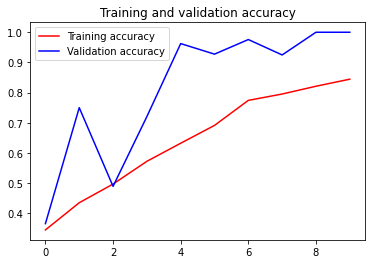

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    
 
  # predicting images
     path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(fn)
print(classes)

In [19]:
from tensorflow.python.distribute import parameter_server_strategy_v2

ImportError: cannot import name 'parameter_server_strategy_v2' from 'tensorflow.python.distribute' (C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\__init__.py)